In [2]:
import numpy as np
import matplotlib.pyplot as plt

import hashlib

# Data Generation

Implementing a function to build the dataset $(x^{(i)}, y^{i})$:

- $x^{(i)} \in Uniform(0,2\pi)$
- $i \in \{1,2\}$
- $y^{(i)} = sin(x^{(i)})$

In [3]:
def train_data():
    i = 2
    x = np.random.uniform(0,np.pi,i)
    y = np.sin(x)
    return x,y

In [4]:
x_train, y_train = train_data() 
print(x_train, y_train)

[1.23750299 2.5097864 ] [0.94497003 0.5906033 ]


In [5]:
assert len(x_train) == 2
assert len(y_train) == 2
np.testing.assert_array_equal(np.sin(x_train), y_train)
for i in range(1000):
    x_tmp, _ = train_data()
    assert x_tmp.min() >= 0.0
    assert x_tmp.max() <= 2*np.pi

# Hypothesis

$\mathcal H_1: h_1(x) = \theta_0 + \theta_1 x$

A straight line through the two points. The parameters $\theta_0$ and $\theta_1$ correspond to the y-intercept and slope of a linear function.

In [6]:
def get_thetas(x,y):
    return x*0 + y*1

$\mathcal H_2: h_2(x) = w$

A constant, i.e. a line parallel to the x-axis. To get the constant-curve with minimum squared error just take for $w$ the mean of the y-values of the two sampled data points.

In [7]:
def get_w(x,y):
    return np.mean(y)

In [8]:
thetas = get_thetas(x_train, y_train)
w = get_w(x_train, y_train)
print(thetas[0], thetas[1])
print(w)

0.9449700336960205 0.5906033004116917
0.7677866670538561


In [9]:
# If your implementation is correct, these tests should not throw an exception

x_train_temp = np.array([0,1])
y_train_temp = np.array([np.sin(x_i) for x_i in x_train_temp])
thetas_test = get_thetas(x_train_temp, y_train_temp)
w_test = get_w(x_train_temp, y_train_temp)


np.testing.assert_almost_equal(thetas_test[0], 0.0)
np.testing.assert_almost_equal(thetas_test[1], 0.8414709848078965)
np.testing.assert_almost_equal(w_test, 0.42073549240394825)

In [10]:
def get_hypothesis_1(thetas):
    return lambda x: thetas[0] + thetas[1] * x

In [11]:
def get_hypothesis_2(w):
    return lambda x: x*0 + w

In [12]:
# we want to compute numerically the expectation w.r.t. x
# p(x) is const. in the intervall [0, 2pi]
x_grid = np.linspace(0, 2*np.pi, 100)
y_grid = np.sin(x_grid)

In [13]:
# If your implementation is correct, these tests should not throw an exception

h1_test = get_hypothesis_1(thetas_test)
h2_test = get_hypothesis_2(w_test)
np.testing.assert_almost_equal(h1_test(x_grid)[10], 0.5340523361780719)
np.testing.assert_almost_equal(h2_test(x_grid)[10], 0.42073549240394825)

In [14]:
# If your implementation is correct, these tests should not throw an exception

h1_test = get_hypothesis_1(thetas_test)
h2_test = get_hypothesis_2(w_test)
np.testing.assert_almost_equal(h1_test(x_grid)[10], 0.5340523361780719)
np.testing.assert_almost_equal(h2_test(x_grid)[10], 0.42073549240394825)

# Plot

Plotting 

- the two examples $(x^{(1)},y^{(2)})$ and $(x^{(2)},y^{(2)})$
- the true target function $sin(x)$ in the interval $[0, 2 \pi]$.
- the hypothesis $h_1(x)$ in the interval $[0, 2 \pi]$
- the hypothesis $h_2(x)$ in the interval $[0, 2 \pi]$

In [15]:
def plot_true_target_function_x_y_h1_h2(x, y, hypothesis1, hypothesis2):
    #red points
    plt.plot(x, y, marker='o', markersize=3, color="red")
    #sin(x)
    plt.plot(x_grid,y_grid, label="target sin(x)")
    #H1
    #not sure here
    plt.plot(hypothesis1(x_grid), x_grid, label="H1")
    #H2
    plt.plot(x_grid, hypothesis2(x_grid), label="H2")
    plt.legend(loc="upper left")
    plt.show()

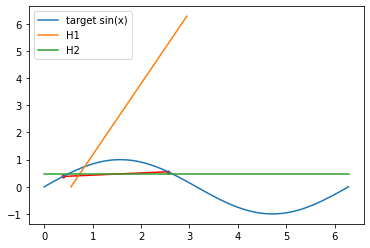

In [16]:
x_train, y_train  = train_data() 
thetas = get_thetas(x_train, y_train)
w = get_w(x_train, y_train)
plot_true_target_function_x_y_h1_h2(x_train, y_train, get_hypothesis_1(thetas), get_hypothesis_2(w))

# Out of Sample Error

In [17]:
def out_of_sample_error(y_preds, y):
    m = len(y_preds)
    return 1/(float(m))* np.sum((y_preds-y)**2)

In [18]:
e_out_h1_test = out_of_sample_error(h1_test(x_grid), y_grid)
np.testing.assert_almost_equal(e_out_h1_test, 11.525485917588728)

# Repeat

In [19]:
def run_experiment(m, x, y):
    xs = np.ndarray((m,2))
    ys = np.ndarray((m,2))
    t0s = np.ndarray(m)
    t1s = np.ndarray(m)
    ws = np.ndarray(m)
    e_out_h1s = np.ndarray(m)
    e_out_h2s = np.ndarray(m)
    for i in range(m):
        xs[i], ys[i] = train_data()
        t0s[i] = get_thetas(xs[i], ys[i])[0]
        t1s[i] = get_thetas(xs[i], ys[i])[1]
        ws[i] = get_w(xs[i], ys[i])
        h1_test = get_hypothesis_1(get_thetas(xs[i], ys[i]))
        h2_test = get_hypothesis_2(get_w(xs[i], ys[i]))
        e_out_h1s[i] = out_of_sample_error(h1_test(xs[i]), ys[i])
        e_out_h2s[i] = out_of_sample_error(h2_test(xs[i]), ys[i])
            
    #raise NotImplementedError()
    
    return xs, ys, t0s, t1s, ws, e_out_h1s, e_out_h2s

In [20]:
x_grid.shape

(100,)

In [21]:
xs, ys, t0s, t1s, ws, e_out_h1s, e_out_h2s = run_experiment(10000, x_grid, y_grid)

# Average and Plot

In [22]:
t0_avg = t0s.mean()
t1_avg = t1s.mean()
thetas_avg = [t0_avg, t1_avg]
w_avg = ws.mean()
h1_avg = get_hypothesis_1(thetas_avg)
h2_avg = get_hypothesis_2(w_avg)
print(thetas_avg)

[0.6320147172236056, 0.6339202328273448]


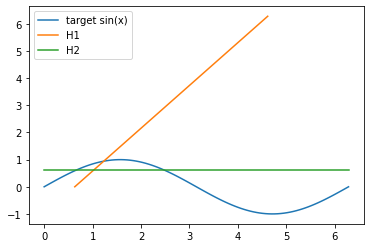

In [23]:
plot_true_target_function_x_y_h1_h2([], [], h1_avg, h2_avg)

In [24]:
expectation_Eout_1 = e_out_h1s.mean()
print ("expectation of E_out of model 1:", expectation_Eout_1)

expectation of E_out of model 1: 1.4680638483660506


In [25]:
expectation_Eout_2 = e_out_h2s.mean()
print ("expectation of E_out of model 2:", expectation_Eout_2)

expectation of E_out of model 2: 0.046972416192516166


# Bias

In [26]:
def bias_square(y_true, y_avg):
    m = len(y_true)
    return 1/(float(m))* np.sum((y_avg - y_true)**2)

    
    """
     Returns the bias^2 of a hypothesis set for the sin-example.
            Parameters:
                    y_true(np.array): The y-values of the target function
                                      at each position on the x_grid
                    y_avg(np.array): The y-values of the avg hypothesis 
                                     at each position on the x_grid
            Returns:
                    variance (double):  Bias^2 of the hypothesis set
    """
    raise NotImplementedError()

In [27]:
bias_1 = bias_square(y_grid,  h1_avg(x_grid))
print ("Bias of model 1:", bias_1)

Bias of model 1: 9.981428224688237


In [28]:
bias_2 = bias_square(y_grid,  h2_avg(x_grid))
print ("Bias of model 2:", bias_2)

Bias of model 2: 0.8956478244401255


# Variance

In [39]:
#task is following: Implement the function to calculate the variances for each of the 10.000 experiments and return them as list or array.
#which is paradox to the later requested values. 
#print("model 1: E_out ≈ bias^2 + variance:  %f ≈ %f + %f" % (expectation_Eout_1, bias_1, var_hypothesis_set_1))
#in this print i have for expectation_Eout_1, bias_1 a single scalar output but for var_hypothesis_set_1 a list 
def variances(hypothesis_func, param_func, xs, ys, x_grid, y_avg):
    m = 10000
    xs = np.ndarray((m,2))
    ys = np.ndarray((m,2))
    variance = np.ndarray(m)
    for i in range(m):
        xs[i], ys[i] = train_data()
        param = param_func(xs[i], ys[i])
        h = hypothesis_func(param_func(xs[i], ys[i]))
        final_h = h(x_grid)
        m = len(x_grid)
        variance[i] = 1/(float(m))* np.sum((final_h - y_avg)**2)
    return variance
    '''
    Returns the variance of a hypothesis set for the sin-example.

            Parameters:
                    hypothesis_func (function): The hypothesis function 1 or 2
                    param_func (function): the function to calculate the parameters
                            from the training data, i.e., get_theta or get_w 
                    xs(np.array): 2D-Array with different training data values for x
                                first dimension: differerent training data sets
                                second dimension: data points in a data set
                    ys(np.array): 2D-Array with different training data values for y
                                first dimension: differerent training data sets
                                second dimension: data points in a data set
                    x_grid(np.array): The x-values for calculating the expectation E_x
                    y_avg(np.array): The y-values of the average hypothesis at the 
                                     positions of x_grid

            Returns:
                    variance (double):  Variance of the hypothesis set for 
                                        a type for training data 
                                        (here two examples per training data set)
    '''
    return NotImplementedError()

In [40]:
var_hypothesis_set_1 = variances(get_hypothesis_1, 
                 get_thetas, 
                 xs, ys, 
                 x_grid, 
                 h1_avg(x_grid))
print(var_hypothesis_set_1)

[1.31061432 1.48498694 0.28932364 ... 1.07243633 0.86395141 1.74571152]


In [41]:
var_hypothesis_set_2 = variances(get_hypothesis_2, 
                 get_w, 
                 xs, ys, 
                 x_grid, 
                 h2_avg(x_grid))
print(var_hypothesis_set_2)

[5.99290051e-02 3.96460521e-03 5.46848270e-05 ... 8.73337794e-03
 2.30762174e-02 5.82325678e-03]


In [46]:
print("model 1: E_out ≈ bias^2 + variance:  %f ≈ %f + %f" % (expectation_Eout_1, bias_1, var_hypothesis_set_1[0]))
print("model 2: E_out ≈ bias^2 + variance:  %f ≈ %f + %f" % (expectation_Eout_2, bias_2, var_hypothesis_set_2[0]))

model 1: E_out ≈ bias^2 + variance:  1.468064 ≈ 9.981428 + 1.310614
model 2: E_out ≈ bias^2 + variance:  0.046972 ≈ 0.895648 + 0.059929


In [43]:
print(expectation_Eout_1)

1.4680638483660506


In [44]:
print(bias_1)

9.981428224688237


In [45]:
print(var_hypothesis_set_1)

[1.31061432 1.48498694 0.28932364 ... 1.07243633 0.86395141 1.74571152]
